In [4]:
accidents = read.csv(file = "../../data/Accident_Information_London_C.csv",
                     header = TRUE,
                     sep = ",",
stringsAsFactors = FALSE)

In [5]:
colnames(accidents)
lapply(accidents, class)

[1] "Accident_Index"                         
 [2] "Accident_Severity"                      
 [3] "Date"                                   
 [4] "Day_of_Week"                            
 [5] "Light_Conditions"                       
 [6] "Number_of_Casualties"                   
 [7] "Number_of_Vehicles"                     
 [8] "Pedestrian_Crossing_Human_Control"      
 [9] "Pedestrian_Crossing_Physical_Facilities"
[10] "Police_Force"                           
[11] "Road_Surface_Conditions"                
[12] "Road_Type"                              
[13] "Special_Conditions_at_Site"             
[14] "Speed_limit"                            
[15] "Time"                                   
[16] "Urban_or_Rural_Area"                    
[17] "Weather_Conditions"                     
[18] "Year"

$Accident_Index
[1] "character"

$Accident_Severity
[1] "character"

$Date
[1] "character"

$Day_of_Week
[1] "character"

$Light_Conditions
[1] "character"

$Number_of_Casualties
[1] "integer"

$Number_of_Vehicles
[1] "integer"

$Pedestrian_Crossing_Human_Control
[1] "integer"

$Pedestrian_Crossing_Physical_Facilities
[1] "integer"

$Police_Force
[1] "character"

$Road_Surface_Conditions
[1] "character"

$Road_Type
[1] "character"

$Special_Conditions_at_Site
[1] "character"

$Speed_limit
[1] "integer"

$Time
[1] "character"

$Urban_or_Rural_Area
[1] "character"

$Weather_Conditions
[1] "character"

$Year
[1] "integer"

In [6]:
a = accidents
unique(accidents$Accident_Severity)
a$Accident_Severity = factor(accidents$Accident_Severity, levels = c("Slight", "Serious", "Fatal"),
                             labels = c("Slight", "Serious", "Fatal"))
unique(a$Accident_Severity)

[1] "Slight"  "Serious" "Fatal"

[1] Slight  Serious Fatal  
Levels: Slight Serious Fatal

In [7]:
#transform Date into 4 seasons
#unique(accidents$Date)
a$Date = sapply(strsplit(accidents$Date,"-"),
                function(x) {
                  x <- as.numeric(x)
                  x[2]
                }
)
a$Date = factor(a$Date, levels = c(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12),
                labels = c("Winter", "Winter", "Spring", "Spring", "Spring", "Summer", "Summer", "Summer", "Autumn", "Autumn", "Autumn", "Winter"))
unique(a$Date)


[1] Winter Spring Summer Autumn
Levels: Winter Spring Summer Autumn

In [8]:
unique(accidents$Day_of_Week)
a$Day_of_Week = factor(accidents$Day_of_Week, levels = c("Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"),
                       labels = c("Weekday", "Weekday", "Weekday", "Weekday", "Weekday", "Weekend", "Weekend")) #labels = c(1, 2, 3, 4, 5, 6, 7))
unique(a$Day_of_Week)

[1] "Saturday"  "Sunday"    "Tuesday"   "Friday"    "Monday"    "Wednesday"
[7] "Thursday"

[1] Weekend Weekday
Levels: Weekday Weekend

In [10]:
#transform Light_Conditions into daylight and darkness
unique(accidents$Light_Conditions)
a$Light_Conditions = factor(accidents$Light_Conditions, levels = c("Daylight", "Darkness - lights lit", "Darkness - lighting unknown", "Darkness - lights unlit"),
                            #labels = c("Daylight", "Darkness", "Darkness", "Darkness")) #labels = c(1, 2, 3, 4))
                            labels = c("Daylight", "Darkness - lights lit", "Darkness - lighting unknown", "Darkness - lights unlit")) #labels = c(1, 2, 3, 4))
unique(a$Light_Conditions)

[1] "Darkness - lights lit"       "Daylight"                   
[3] "Darkness - lights unlit"     "Darkness - lighting unknown"

[1] Darkness - lights lit       Daylight                   
[3] Darkness - lights unlit     Darkness - lighting unknown
4 Levels: Daylight Darkness - lights lit ... Darkness - lights unlit

In [11]:
unique(accidents$Road_Surface_Conditions)
a$Road_Surface_Conditions = factor(accidents$Road_Surface_Conditions, levels = c("Data missing or out of range", "Dry", "Wet or damp", "Frost or ice", "Snow"),
                                   labels = c("Data missing or out of range", "Dry", "Wet or damp", "Frost or ice", "Snow"))
unique(a$Road_Surface_Conditions)


[1] "Dry"                          "Wet or damp"                 
[3] "Frost or ice"                 "Snow"                        
[5] "Data missing or out of range"

[1] Dry                          Wet or damp                 
[3] Frost or ice                 Snow                        
[5] Data missing or out of range
Levels: Data missing or out of range Dry Wet or damp Frost or ice Snow

In [12]:
unique(accidents$Road_Type)
a$Road_Type = factor(accidents$Road_Type, levels = c("Unknown", "Single carriageway", "Dual carriageway", "One way street", "Roundabout", "Slip road"),
                     labels = c("Unknown", "Single carriageway", "Dual carriageway", "One way street", "Roundabout", "Slip road")) 
unique(a$Road_Type)

[1] "Single carriageway" "One way street"     "Dual carriageway"  
[4] "Roundabout"         "Slip road"          "Unknown"

[1] Single carriageway One way street     Dual carriageway   Roundabout        
[5] Slip road          Unknown           
6 Levels: Unknown Single carriageway Dual carriageway ... Slip road

In [23]:
#transform Special_Conditions_at_Site into none and special
unique(accidents$Special_Conditions_at_Site)
a$Special_Conditions_at_Site = factor(accidents$Special_Conditions_at_Site, levels = c("Data missing or out of range", "None", "Road surface defective", "Roadworks", "Auto traffic signal - out", "Oil or diesel", "Auto signal part defective", "Road sign or marking defective or obscured"),
                                      labels = c("None", "None","Special", "Special", "Special", "Special", "Special", "Special")) #labels = c(0, 1, 2, 3, 4, 5, 6, 7))
unique(a$Special_Conditions_at_Site)

[1] "None"                                      
[2] "Road surface defective"                    
[3] "Roadworks"                                 
[4] "Auto traffic signal - out"                 
[5] "Oil or diesel"                             
[6] "Auto signal part defective"                
[7] "Road sign or marking defective or obscured"
[8] "Data missing or out of range"

[1] None    Special
Levels: None Special

In [14]:
unique(accidents$Time)
a$Time = sapply(strsplit(accidents$Time,":"),
                function(x) {
                  x <- as.numeric(x)
                  x[1]+x[2]/60
                }
)
# Midnight - 6am = Night; 6am - Noon = Morning; Noon - 6pm = afternoon; 6pm - Midnight = evening
a$Time = cut(a$Time, breaks=4, labels=c("Night", "Morning", "Afternoon", "Evening"))
unique(a$Time)

[1] "22:50:00" "20:50:00" "10:02:00" "02:45:00" "12:30:00" "18:05:00"
   [7] "10:00:00" "15:00:00" "11:59:00" "14:22:00" "12:25:00" "07:30:00"
  [13] "00:30:00" "14:35:00" "17:45:00" "22:30:00" "15:30:00" "04:52:00"
  [19] "23:20:00" "16:00:00" "18:50:00" "08:25:00" "16:20:00" "21:00:00"
  [25] "13:05:00" "08:30:00" "09:20:00" "11:15:00" "19:05:00" "07:25:00"
  [31] "11:40:00" "15:10:00" "13:31:00" "13:00:00" "15:45:00" "10:05:00"
  [37] "22:26:00" "15:15:00" "21:15:00" "18:00:00" "10:41:00" "17:00:00"
  [43] "11:26:00" "06:35:00" "07:13:00" "09:45:00" "19:30:00" "07:15:00"
  [49] "17:15:00" "12:05:00" "10:59:00" "18:15:00" "06:58:00" "16:52:00"
  [55] "14:30:00" "16:55:00" "14:00:00" "15:33:00" "08:40:00" "06:50:00"
  [61] "13:30:00" "09:05:00" "12:55:00" "13:45:00" "09:55:00" "14:45:00"
  [67] "15:40:00" "16:17:00" "09:08:00" "12:26:00" "22:10:00" "08:50:00"
  [73] "09:00:00" "18:30:00" "18:57:00" "12:50:00" "16:50:00" "16:28:00"
  [79] "13:40:00" "04:07:00" "07:50:00" "17:50:00" "23:37:00" "08:45:00"
  [85] "18:10:00" "16:26:00" "23:45:00" "00:40:00" "13:44:00" "00:04:00"
  [91] "17:20:00" "17:10:00" "17:29:00" "13:46:00" "08:00:00" "13:15:00"
  [97] "22:37:00" "10:35:00" "13:52:00" "16:29:00" "23:00:00" "08:36:00"
 [103] "13:35:00" "15:05:00" "17:25:00" "11:22:00" "16:40:00" "11:20:00"
 [109] "11:00:00" "11:05:00" "21:09:00" "09:35:00" "00:33:00" "17:40:00"
 [115] "07:55:00" "09:57:00" "16:46:00" "19:23:00" "10:15:00" "10:45:00"
 [121] "14:39:00" "09:50:00" "14:15:00" "20:20:00" "08:55:00" "09:22:00"
 [127] "09:52:00" "14:40:00" "12:40:00" "06:40:00" "18:20:00" "11:34:00"
 [133] "01:00:00" "04:40:00" "12:58:00" "18:21:00" "22:36:00" "22:07:00"
 [139] "20:56:00" "08:27:00" "18:27:00" "13:21:00" "10:22:00" "18:45:00"
 [145] "08:05:00" "23:33:00" "10:30:00" "18:22:00" "03:40:00" "07:03:00"
 [151] "15:35:00" "20:34:00" "22:11:00" "18:35:00" "14:08:00" "16:45:00"
 [157] "16:32:00" "17:33:00" "10:39:00" "18:31:00" "17:17:00" "08:43:00"
 [163] "17:23:00" "19:40:00" "21:17:00" "15:53:00" "06:25:00" "10:01:00"
 [169] "13:50:00" "16:30:00" "21:25:00" "18:25:00" "19:15:00" "22:31:00"
 [175] "08:35:00" "14:05:00" "11:52:00" "13:39:00" "12:04:00" "09:32:00"
 [181] "22:20:00" "14:31:00" "15:25:00" "01:21:00" "21:45:00" "09:14:00"
 [187] "08:26:00" "07:10:00" "23:15:00" "09:02:00" "17:55:00" "00:10:00"
 [193] "09:15:00" "07:21:00" "14:20:00" "05:05:00" "16:39:00" "10:55:00"
 [199] "21:42:00" "23:30:00" "08:20:00" "12:00:00" "07:35:00" "13:02:00"
 [205] "00:15:00" "02:50:00" "02:38:00" "20:38:00" "15:50:00" "16:41:00"
 [211] "09:30:00" "19:18:00" "13:10:00" "13:25:00" "21:30:00" "16:15:00"
 [217] "17:41:00" "18:13:00" "09:21:00" "18:55:00" "15:26:00" "03:28:00"
 [223] "19:00:00" "17:59:00" "13:59:00" "00:52:00" "09:06:00" "22:00:00"
 [229] "20:05:00" "07:53:00" "10:07:00" "20:10:00" "06:10:00" "19:50:00"
 [235] "16:25:00" "19:24:00" "15:34:00" "23:12:00" "14:25:00" "16:35:00"
 [241] "13:20:00" "21:55:00" "12:22:00" "10:13:00" "09:44:00" "12:54:00"
 [247] "22:15:00" "20:30:00" "23:53:00" "03:30:00" "08:49:00" "15:22:00"
 [253] "17:30:00" "11:30:00" "06:52:00" "18:01:00" "12:07:00" "18:08:00"
 [259] "11:25:00" "18:24:00" "22:54:00" "06:45:00" "15:29:00" "17:24:00"
 [265] "14:11:00" "08:10:00" "09:33:00" "08:24:00" "16:43:00" "12:15:00"
 [271] "23:59:00" "19:43:00" "07:56:00" "19:47:00" "15:03:00" "20:00:00"
 [277] "16:54:00" "01:26:00" "01:57:00" "09:25:00" "14:28:00" "04:38:00"
 [283] "22:02:00" "04:45:00" "07:05:00" "14:50:00" "09:39:00" "08:29:00"
 [289] "09:11:00" "10:50:00" "10:10:00" "22:46:00" "01:20:00" "09:40:00"
 [295] "02:59:00" "05:06:00" "14:23:00" "02:35:00" "23:49:00" "11:57:00"
 [301] "21:07:00" "20:02:00" "12:52:00" "11:07:00" "23:40:00" "13:24:00"
 [307] "23:35:00" "19:20:00" "05:55:00" "09:01:00" "13:58:00" "19:12:00"
 [313] "04:30:00" "16:19:00" "13:32:00" "13:55:00" "15:42:00" "14:10:00"
 [319] "21:20:00" "22:40:00" "10:23:00" "08:21:00" "08:15:00" "10:04:00"
 [325] "07:31:00" "16:49:00" "01:48:00" "10:51:00" "08:08:00"

[1] Evening   Morning   Night     Afternoon
Levels: Night Morning Afternoon Evening

In [15]:
unique(accidents$Weather_Conditions)
a$Weather_Conditions = factor(accidents$Weather_Conditions, levels = c("Unknown", "Other", "Fine no high winds", "Fine + high winds", "Raining no high winds", "Raining + high winds", "Snowing no high winds", "Fog or mist"),
                              labels = c("Unknown", "Unknown", "Fine", "Fine", "Bad", "Bad", "Bad", "Bad")) #labels = c(0, 1, 2, 3, 4, 5, 6, 7))
unique(a$Weather_Conditions)

[1] "Fine no high winds"    "Raining no high winds" "Snowing no high winds"
[4] "Other"                 "Unknown"               "Raining + high winds" 
[7] "Fine + high winds"     "Fog or mist"

[1] Fine    Bad     Unknown
Levels: Unknown Fine Bad

In [38]:
#select subset
b = subset(a, select = c(3, 4, 5, 7, 11, 12, 15, 17))
glimpse(b)

Observations: 4,084
Variables: 8
$ Date                    <fct> Winter, Winter, Winter, Winter, Winter, Win...
$ Day_of_Week             <fct> Weekend, Weekend, Weekend, Weekend, Weekday...
$ Light_Conditions        <fct> Darkness - lights lit, Darkness - lights li...
$ Number_of_Vehicles      <int> 2, 2, 3, 2, 1, 2, 2, 2, 1, 3, 1, 1, 2, 2, 2...
$ Road_Surface_Conditions <fct> Dry, Dry, Dry, Wet or damp, Dry, Dry, Dry, ...
$ Road_Type               <fct> Single carriageway, Single carriageway, Sin...
$ Time                    <fct> Evening, Evening, Morning, Night, Afternoon...
$ Weather_Conditions      <fct> Fine, Fine, Fine, Bad, Fine, Fine, Fine, Ba...


In [25]:

library(dplyr)
library(cluster)
library(ggplot2) 


#compute the distance matrix using ‘gower’
gower_dist <- daisy(b[, -1], metric = "gower", type = list(logratio = 3))
summary(gower_dist)
gower_mat <- as.matrix(gower_dist)

8337486 dissimilarities, summarized :
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.1981  0.3410  0.3332  0.4838  1.0000 
Metric :  mixed ;  Types = N, N, I, N, N, N, N 
Number of objects : 4084

In [26]:
# number of cluster PAM
sil <- c(NA)
for(i in 2:10){
  pam_fit <- pam(gower_mat, diss=TRUE, k=i)
  sil[i] <-pam_fit$silinfo$avg.width
}

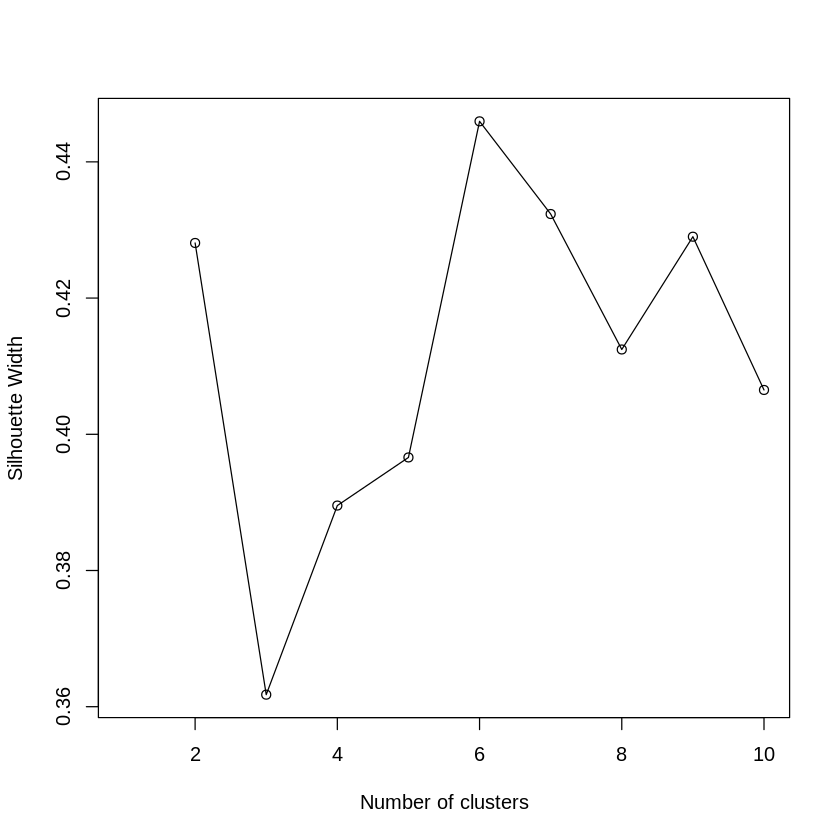

In [27]:
plot(1:10, sil,
     xlab = "Number of clusters",
     ylab = "Silhouette Width")
lines(1:10, sil)

In [39]:
#Cluster Interpretation k=6
pam_fit <- pam(gower_dist, diss = TRUE, k = 6)



In [21]:
library(cluster)
#Cluster Interpretation k = 7
pam_fit_7 <- pam(gower_dist, diss = TRUE, k = 7)


In [48]:
#Cluster Interpretation k = 5
pam_fit_5 <- pam(gower_dist, diss = TRUE, k = 5)

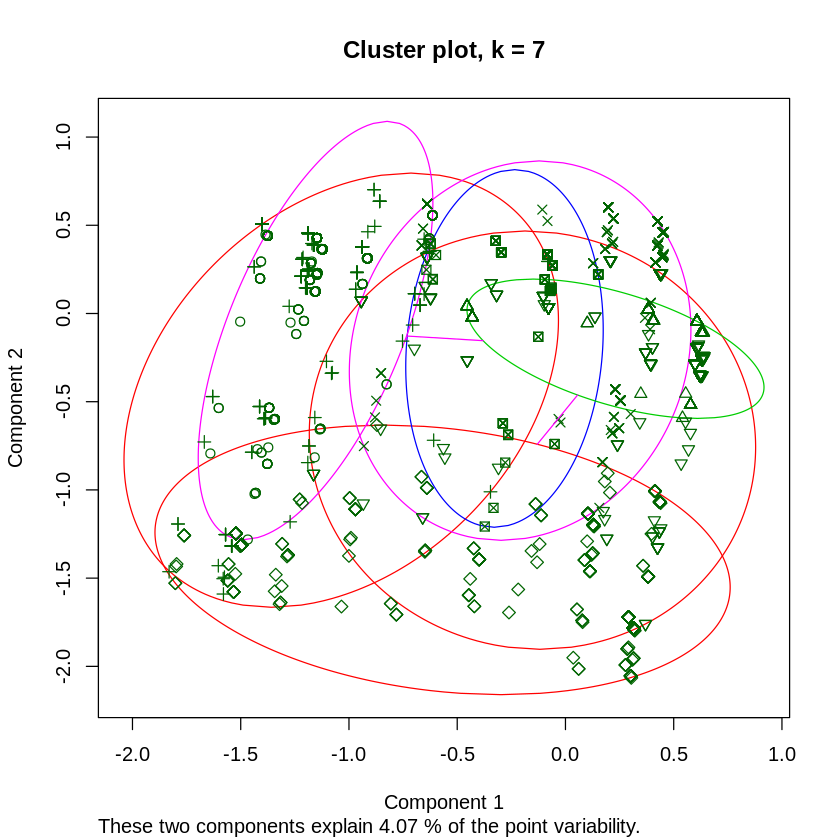

In [22]:
#plot for k=7
clusplot(pam_fit_7, main = "Cluster plot, k = 7", 
         color = TRUE)

In [35]:
head(pam_fit$cluster)

1 2 3 4 5 6 
1 1 2 3 4 1

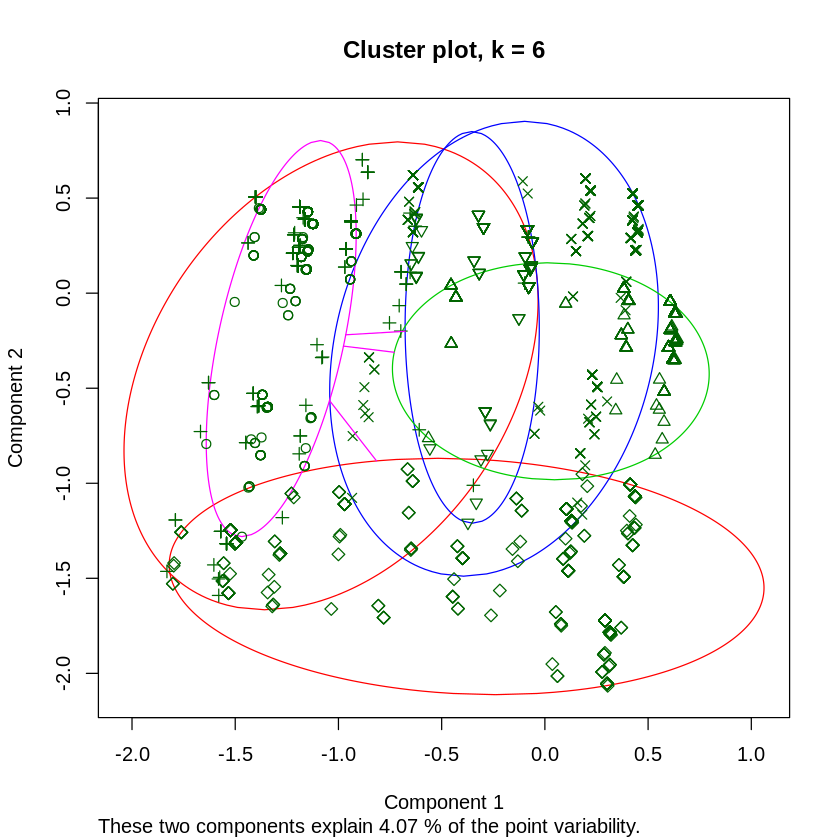

In [40]:
clusplot(pam_fit, main = "Cluster plot, k = 6", 
         color = TRUE)

In [41]:
c <- data.frame(b, pam_fit$cluster)

pam_results <- b %>%
  mutate(cluster = pam_fit$clustering) %>%
  group_by(cluster) %>%
  do(the_summary = summary(.))
pam_results$the_summary


[[1]]
     Date      Day_of_Week                     Light_Conditions
 Winter:182   Weekday:531   Daylight                   :  0    
 Spring:114   Weekend: 55   Darkness - lights lit      :586    
 Summer: 82                 Darkness - lighting unknown:  0    
 Autumn:208                 Darkness - lights unlit    :  0    
                                                               
                                                               
 Number_of_Vehicles                 Road_Surface_Conditions
 Min.   :1.00       Data missing or out of range:  0       
 1st Qu.:1.00       Dry                         :524       
 Median :2.00       Wet or damp                 : 57       
 Mean   :1.72       Frost or ice                :  4       
 3rd Qu.:2.00       Snow                        :  1       
 Max.   :5.00                                              
              Road_Type          Time     Weather_Conditions    cluster 
 Unknown           :  0   Night    : 72   Unknown: 12

In [42]:
#Output medoids
b[pam_fit$medoids, ]

,Date,Day_of_Week,Light_Conditions,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Time,Weather_Conditions
4082,Winter,Weekday,Darkness - lights lit,2,Dry,Single carriageway,Evening,Fine
4079,Winter,Weekday,Daylight,2,Dry,Single carriageway,Morning,Fine
4002,Autumn,Weekend,Darkness - lights lit,1,Dry,Single carriageway,Night,Fine
26,Winter,Weekday,Daylight,2,Dry,Single carriageway,Afternoon,Fine
4034,Autumn,Weekday,Daylight,2,Wet or damp,Single carriageway,Morning,Bad
4005,Autumn,Weekday,Daylight,2,Dry,Single carriageway,Evening,Fine


In [43]:
b[pam_fit$cluster]

Date,Date.1,Day_of_Week,Light_Conditions,Number_of_Vehicles,Date.2,Day_of_Week.1,Road_Surface_Conditions,Road_Surface_Conditions.1,Road_Surface_Conditions.2,⋯,Light_Conditions.247,Day_of_Week.1250,Day_of_Week.1251,Light_Conditions.248,Day_of_Week.1252,Date.583,Date.584,Date.585,Road_Surface_Conditions.395,Number_of_Vehicles.1236
Winter,Winter,Weekend,Darkness - lights lit,2,Winter,Weekend,Dry,Dry,Dry,⋯,Darkness - lights lit,Weekend,Weekend,Darkness - lights lit,Weekend,Winter,Winter,Winter,Dry,2
Winter,Winter,Weekend,Darkness - lights lit,2,Winter,Weekend,Dry,Dry,Dry,⋯,Darkness - lights lit,Weekend,Weekend,Darkness - lights lit,Weekend,Winter,Winter,Winter,Dry,2
Winter,Winter,Weekend,Daylight,3,Winter,Weekend,Dry,Dry,Dry,⋯,Daylight,Weekend,Weekend,Daylight,Weekend,Winter,Winter,Winter,Dry,3
Winter,Winter,Weekend,Darkness - lights lit,2,Winter,Weekend,Wet or damp,Wet or damp,Wet or damp,⋯,Darkness - lights lit,Weekend,Weekend,Darkness - lights lit,Weekend,Winter,Winter,Winter,Wet or damp,2
Winter,Winter,Weekday,Daylight,1,Winter,Weekday,Dry,Dry,Dry,⋯,Daylight,Weekday,Weekday,Daylight,Weekday,Winter,Winter,Winter,Dry,1
Winter,Winter,Weekday,Darkness - lights lit,2,Winter,Weekday,Dry,Dry,Dry,⋯,Darkness - lights lit,Weekday,Weekday,Darkness - lights lit,Weekday,Winter,Winter,Winter,Dry,2
Winter,Winter,Weekday,Daylight,2,Winter,Weekday,Dry,Dry,Dry,⋯,Daylight,Weekday,Weekday,Daylight,Weekday,Winter,Winter,Winter,Dry,2
Winter,Winter,Weekday,Daylight,2,Winter,Weekday,Wet or damp,Wet or damp,Wet or damp,⋯,Daylight,Weekday,Weekday,Daylight,Weekday,Winter,Winter,Winter,Wet or damp,2
Winter,Winter,Weekday,Daylight,1,Winter,Weekday,Wet or damp,Wet or damp,Wet or damp,⋯,Daylight,Weekday,Weekday,Daylight,Weekday,Winter,Winter,Winter,Wet or damp,1
Winter,Winter,Weekday,Darkness - lights lit,3,Winter,Weekday,Wet or damp,Wet or damp,Wet or damp,⋯,Darkness - lights lit,Weekday,Weekday,Darkness - lights lit,Weekday,Winter,Winter,Winter,Wet or damp,3


Warning message:
“argument frame is deprecated; please use ellipse instead.”Warning message:
“argument frame.type is deprecated; please use ellipse.type instead.”

ERROR: Error in array(x, c(length(x), 1L), if (!is.null(names(x))) list(names(x), : 'data' must be of a vector type, was 'NULL'


In [44]:
install.packages("Rtsne")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [45]:
library(Rtsne)
# Cluster Visualization #
#########################
tsne_obj <- Rtsne(gower_dist, is_distance = TRUE)


X,Y,cluster,id
14.568358,-17.350712,1,200501CP00001
14.568358,-17.350701,1,200501CP00002
22.140258,-24.377910,2,200501CP00003
1.524024,-17.167523,3,200501CP00004
-22.095767,-18.752719,4,200501CP00005
18.621545,-3.029616,1,200501CP00006


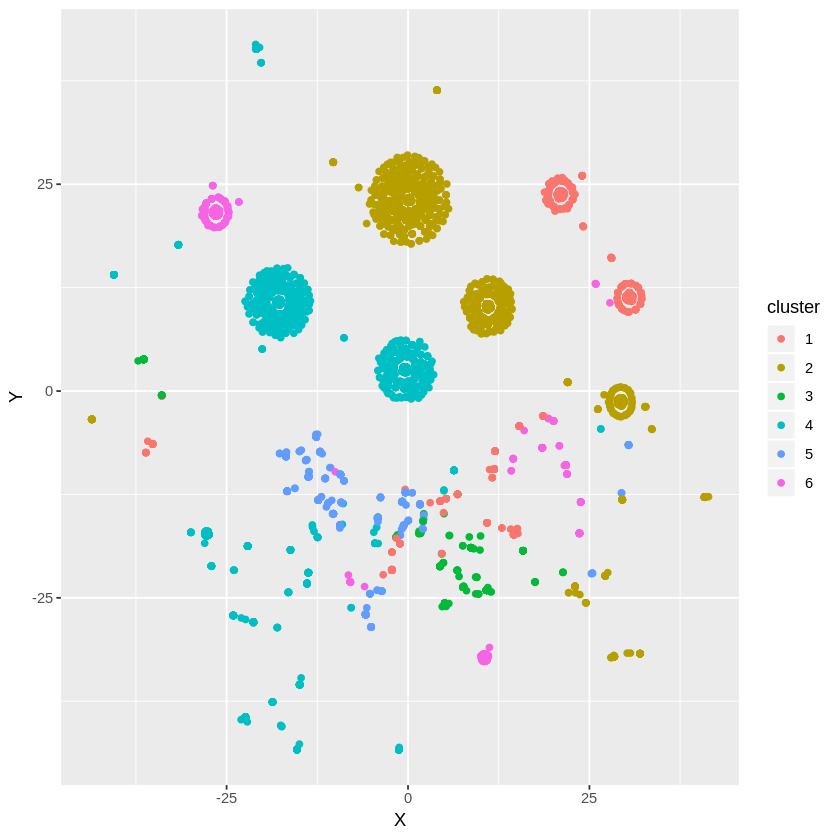

In [46]:
#visualize clusters for k=6
tsne_data <- tsne_obj$Y %>%
  data.frame() %>%
  setNames(c("X", "Y")) %>%
  mutate(cluster = factor(pam_fit$clustering),
         id = a$Accident_Index)

head(tsne_data)
colnames(tsne_data)[3] = "cluster"

ggplot(aes(x = X, y = Y), data = tsne_data) + geom_point(aes(color = cluster))

X,Y,cluster,id
14.568358,-17.350712,1,200501CP00001
14.568358,-17.350701,1,200501CP00002
22.140258,-24.377910,2,200501CP00003
1.524024,-17.167523,3,200501CP00004
-22.095767,-18.752719,4,200501CP00005
18.621545,-3.029616,1,200501CP00006


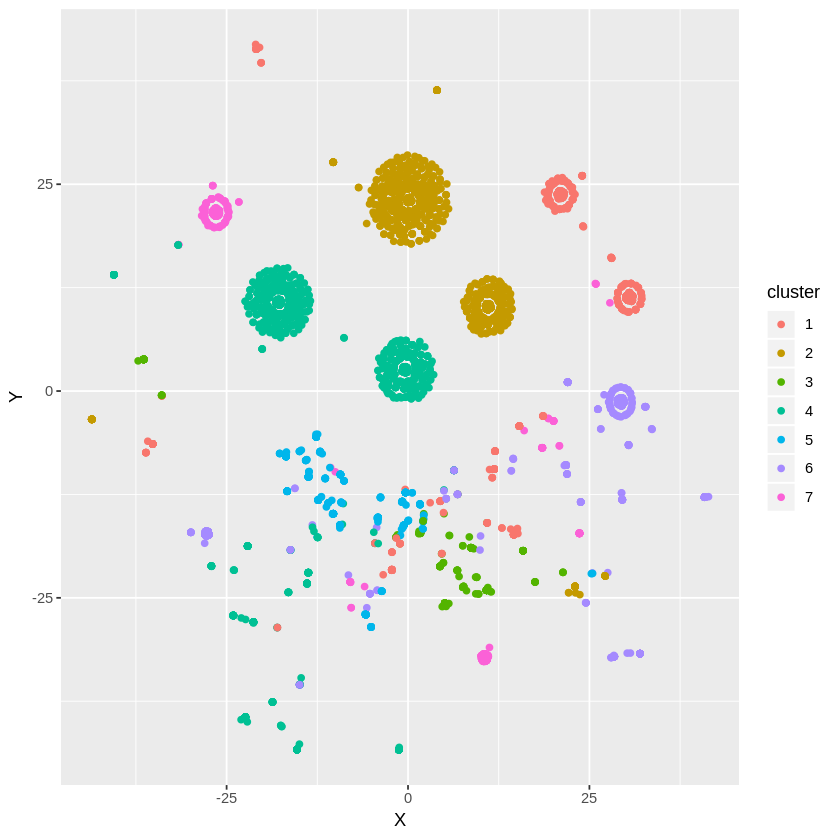

In [47]:
##Visualization for 7 clusters
tsne_data <- tsne_obj$Y %>%
  data.frame() %>%
  setNames(c("X", "Y")) %>%
  mutate(cluster = factor(pam_fit_7$clustering),
         id = a$Accident_Index)

head(tsne_data)
colnames(tsne_data)[3] = "cluster"

ggplot(aes(x = X, y = Y), data = tsne_data) + geom_point(aes(color = cluster))

X,Y,cluster,id
14.568358,-17.350712,1,200501CP00001
14.568358,-17.350701,1,200501CP00002
22.140258,-24.377910,2,200501CP00003
1.524024,-17.167523,3,200501CP00004
-22.095767,-18.752719,4,200501CP00005
18.621545,-3.029616,1,200501CP00006


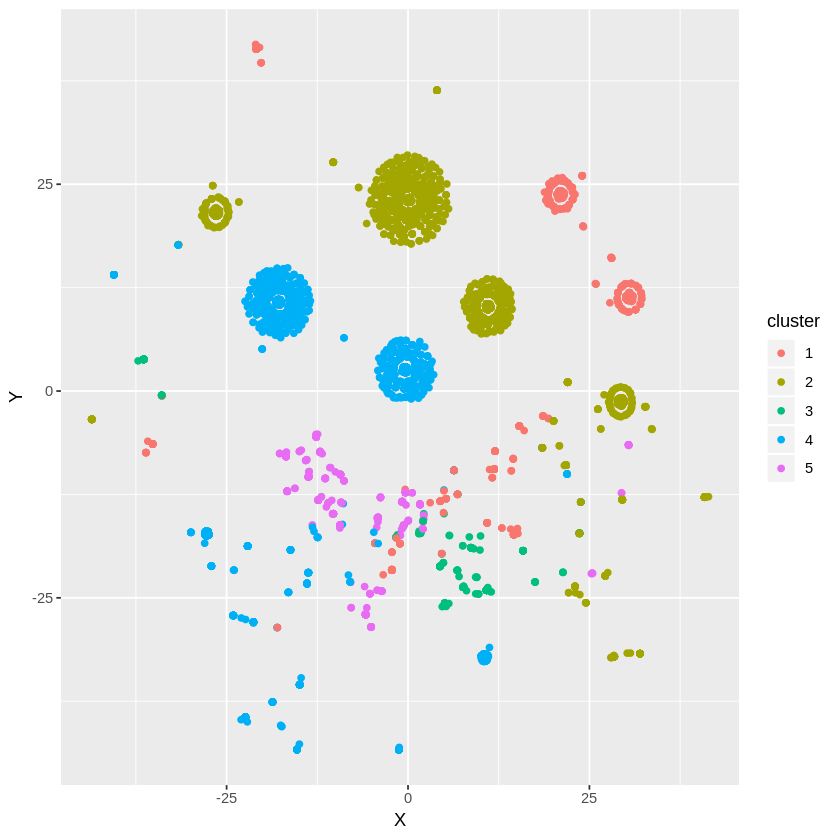

In [49]:
#visualize clusters for k=5
tsne_data <- tsne_obj$Y %>%
  data.frame() %>%
  setNames(c("X", "Y")) %>%
  mutate(cluster = factor(pam_fit_5$clustering),
         id = a$Accident_Index)

head(tsne_data)
colnames(tsne_data)[3] = "cluster"

ggplot(aes(x = X, y = Y), data = tsne_data) + geom_point(aes(color = cluster))

In [70]:
# examine results in each class
p1 <- which(pam_fit$clustering %in% c(1))
b[p1,]
p2 <- which(pam_fit$clustering %in% c(2))
b[p2,]
p3 <- which(pam_fit$clustering %in% c(3))
b[p3,]
p4 <- which(pam_fit$clustering %in% c(4))
b[p4,]
p5 <- which(pam_fit$clustering %in% c(5))
b[p5,]
p6 <- which(pam_fit$clustering %in% c(6))
b[p6,]

,Date,Day_of_Week,Light_Conditions,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Time,Weather_Conditions
1,Winter,Weekend,Darkness - lights lit,2,Dry,Single carriageway,Evening,Fine
2,Winter,Weekend,Darkness - lights lit,2,Dry,Single carriageway,Evening,Fine
6,Winter,Weekday,Darkness - lights lit,2,Dry,Roundabout,Evening,Fine
17,Winter,Weekday,Darkness - lights lit,1,Dry,Dual carriageway,Evening,Fine
25,Winter,Weekday,Darkness - lights lit,1,Dry,Single carriageway,Evening,Fine
41,Spring,Weekday,Darkness - lights lit,2,Dry,Single carriageway,Evening,Fine
55,Spring,Weekday,Darkness - lights lit,2,Dry,Dual carriageway,Evening,Fine
80,Spring,Weekday,Darkness - lights lit,2,Dry,Dual carriageway,Evening,Fine
95,Spring,Weekday,Darkness - lights lit,2,Dry,Dual carriageway,Evening,Fine
102,Summer,Weekday,Darkness - lights lit,2,Dry,Dual carriageway,Evening,Fine


,Date,Day_of_Week,Light_Conditions,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Time,Weather_Conditions
3,Winter,Weekend,Daylight,3,Dry,Single carriageway,Morning,Fine
7,Winter,Weekday,Daylight,2,Dry,Single carriageway,Morning,Fine
13,Winter,Weekday,Daylight,2,Dry,Single carriageway,Morning,Fine
23,Winter,Weekday,Daylight,1,Dry,Single carriageway,Morning,Fine
27,Winter,Weekday,Daylight,1,Dry,Dual carriageway,Morning,Fine
29,Winter,Weekday,Daylight,2,Dry,Single carriageway,Morning,Fine
32,Winter,Weekday,Daylight,1,Dry,One way street,Morning,Fine
33,Winter,Weekday,Daylight,2,Dry,Single carriageway,Morning,Fine
38,Spring,Weekday,Daylight,3,Dry,One way street,Morning,Fine
43,Spring,Weekend,Daylight,1,Dry,Dual carriageway,Morning,Fine


,Date,Day_of_Week,Light_Conditions,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Time,Weather_Conditions
4,Winter,Weekend,Darkness - lights lit,2,Wet or damp,One way street,Night,Bad
14,Winter,Weekend,Darkness - lights lit,2,Dry,Dual carriageway,Night,Fine
19,Winter,Weekday,Darkness - lights lit,1,Dry,Single carriageway,Night,Fine
90,Spring,Weekday,Darkness - lights lit,1,Dry,Single carriageway,Night,Fine
104,Summer,Weekend,Darkness - lights lit,1,Dry,One way street,Night,Fine
108,Summer,Weekday,Darkness - lights lit,1,Dry,Dual carriageway,Night,Fine
143,Summer,Weekend,Darkness - lights lit,2,Dry,Single carriageway,Night,Fine
176,Summer,Weekend,Darkness - lights lit,1,Dry,Single carriageway,Night,Fine
251,Autumn,Weekend,Darkness - lights lit,2,Dry,Single carriageway,Night,Fine
262,Autumn,Weekend,Darkness - lights lit,1,Dry,Single carriageway,Night,Fine


,Date,Day_of_Week,Light_Conditions,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Time,Weather_Conditions
5,Winter,Weekday,Daylight,1,Dry,Dual carriageway,Afternoon,Fine
11,Winter,Weekday,Daylight,1,Dry,Single carriageway,Afternoon,Fine
12,Winter,Weekend,Daylight,1,Dry,Single carriageway,Afternoon,Fine
15,Winter,Weekend,Daylight,2,Dry,Single carriageway,Afternoon,Fine
18,Winter,Weekday,Daylight,2,Dry,Roundabout,Afternoon,Fine
24,Winter,Weekend,Daylight,2,Dry,One way street,Afternoon,Fine
26,Winter,Weekday,Daylight,2,Dry,Single carriageway,Afternoon,Fine
28,Winter,Weekday,Daylight,1,Dry,Single carriageway,Afternoon,Fine
34,Winter,Weekend,Daylight,2,Dry,Dual carriageway,Afternoon,Fine
35,Spring,Weekday,Daylight,2,Wet or damp,One way street,Afternoon,Fine


,Date,Day_of_Week,Light_Conditions,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Time,Weather_Conditions
8,Winter,Weekday,Daylight,2,Wet or damp,One way street,Afternoon,Bad
9,Winter,Weekday,Daylight,1,Wet or damp,Single carriageway,Morning,Bad
10,Winter,Weekday,Darkness - lights lit,3,Wet or damp,Single carriageway,Night,Bad
16,Winter,Weekday,Darkness - lights lit,1,Wet or damp,Single carriageway,Afternoon,Bad
20,Winter,Weekday,Darkness - lights lit,2,Wet or damp,Dual carriageway,Evening,Bad
21,Winter,Weekday,Daylight,1,Wet or damp,Dual carriageway,Afternoon,Bad
22,Winter,Weekday,Darkness - lights lit,1,Wet or damp,Single carriageway,Evening,Bad
30,Winter,Weekday,Daylight,2,Wet or damp,Dual carriageway,Morning,Bad
39,Spring,Weekday,Darkness - lights lit,2,Wet or damp,Roundabout,Evening,Bad
49,Spring,Weekday,Daylight,3,Wet or damp,Single carriageway,Morning,Fine


,Date,Day_of_Week,Light_Conditions,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Time,Weather_Conditions
31,Winter,Weekday,Daylight,2,Dry,Single carriageway,Evening,Fine
42,Spring,Weekday,Darkness - lights unlit,1,Dry,Single carriageway,Evening,Fine
51,Spring,Weekday,Daylight,2,Dry,Dual carriageway,Evening,Fine
54,Spring,Weekday,Daylight,1,Dry,One way street,Evening,Fine
56,Spring,Weekday,Daylight,1,Wet or damp,One way street,Evening,Unknown
59,Spring,Weekday,Daylight,2,Dry,Dual carriageway,Evening,Fine
83,Spring,Weekday,Daylight,2,Dry,One way street,Evening,Fine
84,Spring,Weekday,Daylight,3,Wet or damp,Single carriageway,Evening,Fine
149,Summer,Weekday,Daylight,2,Dry,Dual carriageway,Evening,Fine
154,Summer,Weekday,Daylight,2,Dry,Single carriageway,Evening,Fine


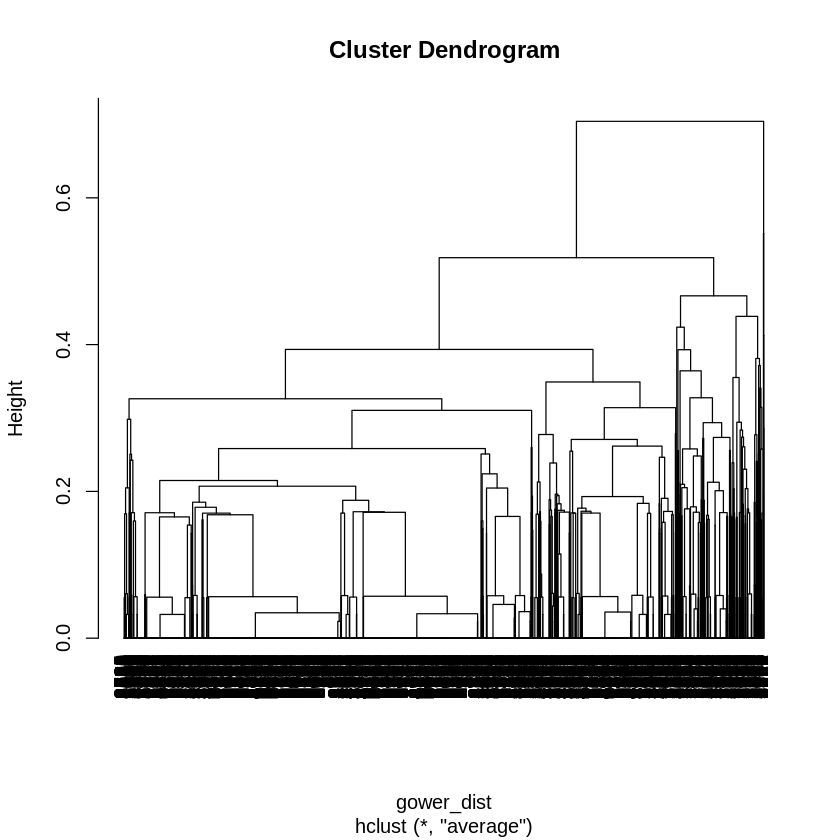

In [22]:
#######################
# Hierarchical method # 
#######################
h <- hclust(gower_dist, method="average")
plot(h, hang=-0.1)
clus6 <- cutree(h, 6)

In [23]:
library(cluster)

# compare DIANA results to PAM
d <- diana(gower_dist)
d6 <- cutree(d, 6)

In [33]:
#PAM results with accident id attacjhed to cluster
result1 <- c %>% mutate(id = a$Accident_Index) %>% dplyr::select(id, pam_fit.cluster)

In [39]:
head(result1)

id,pam_fit.cluster
200501CP00001,1
200501CP00002,1
200501CP00003,2
200501CP00004,3
200501CP00005,4
200501CP00006,1


In [35]:
table(result1$pam_fit.cluster, d6)

   d6
       1    2    3    4    5    6
  1  521    0    3   55    7    0
  2   32 1203    0    0   18    0
  3  203    0   36    5    0    5
  4   94 1114    1   21    7    0
  5    0   64   34  298    0    0
  6   13  345    1    2    2    0

In [36]:
# examine results in each class
t_c1 <- which(d6 %in% c(1))
b[t_c1,]
t_c2 <- which(d6 %in% c(2))
b[t_c2,]
t_c3 <- which(d6 %in% c(3))
b[t_c3,]
t_c4 <- which(d6 %in% c(4))
b[t_c4,]
t_c5 <- which(d6 %in% c(5))
b[t_c5,]
t_c6 <- which(d6 %in% c(6))
b[t_c6,]

,Date,Day_of_Week,Light_Conditions,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Time,Weather_Conditions
1,Winter,Weekend,Darkness - lights lit,2,Dry,Single carriageway,Evening,Fine
2,Winter,Weekend,Darkness - lights lit,2,Dry,Single carriageway,Evening,Fine
6,Winter,Weekday,Darkness - lights lit,2,Dry,Roundabout,Evening,Fine
14,Winter,Weekend,Darkness - lights lit,2,Dry,Dual carriageway,Night,Fine
17,Winter,Weekday,Darkness - lights lit,1,Dry,Dual carriageway,Evening,Fine
19,Winter,Weekday,Darkness - lights lit,1,Dry,Single carriageway,Night,Fine
25,Winter,Weekday,Darkness - lights lit,1,Dry,Single carriageway,Evening,Fine
41,Spring,Weekday,Darkness - lights lit,2,Dry,Single carriageway,Evening,Fine
42,Spring,Weekday,Darkness - lights unlit,1,Dry,Single carriageway,Evening,Fine
55,Spring,Weekday,Darkness - lights lit,2,Dry,Dual carriageway,Evening,Fine


,Date,Day_of_Week,Light_Conditions,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Time,Weather_Conditions
3,Winter,Weekend,Daylight,3,Dry,Single carriageway,Morning,Fine
5,Winter,Weekday,Daylight,1,Dry,Dual carriageway,Afternoon,Fine
7,Winter,Weekday,Daylight,2,Dry,Single carriageway,Morning,Fine
11,Winter,Weekday,Daylight,1,Dry,Single carriageway,Afternoon,Fine
12,Winter,Weekend,Daylight,1,Dry,Single carriageway,Afternoon,Fine
13,Winter,Weekday,Daylight,2,Dry,Single carriageway,Morning,Fine
15,Winter,Weekend,Daylight,2,Dry,Single carriageway,Afternoon,Fine
18,Winter,Weekday,Daylight,2,Dry,Roundabout,Afternoon,Fine
23,Winter,Weekday,Daylight,1,Dry,Single carriageway,Morning,Fine
24,Winter,Weekend,Daylight,2,Dry,One way street,Afternoon,Fine


,Date,Day_of_Week,Light_Conditions,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Time,Weather_Conditions
4,Winter,Weekend,Darkness - lights lit,2,Wet or damp,One way street,Night,Bad
227,Autumn,Weekend,Darkness - lights lit,2,Wet or damp,Unknown,Evening,Bad
315,Winter,Weekend,Darkness - lights lit,1,Wet or damp,Single carriageway,Night,Fine
395,Spring,Weekend,Darkness - lights lit,2,Wet or damp,Dual carriageway,Evening,Bad
401,Spring,Weekend,Daylight,1,Wet or damp,Single carriageway,Afternoon,Bad
404,Spring,Weekend,Daylight,2,Wet or damp,Single carriageway,Afternoon,Bad
407,Spring,Weekend,Daylight,3,Wet or damp,Single carriageway,Morning,Bad
433,Spring,Weekend,Darkness - lights lit,1,Wet or damp,Single carriageway,Night,Bad
437,Winter,Weekend,Darkness - lights lit,1,Wet or damp,Dual carriageway,Night,Fine
574,Autumn,Weekend,Darkness - lights lit,2,Wet or damp,Single carriageway,Evening,Bad


,Date,Day_of_Week,Light_Conditions,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Time,Weather_Conditions
8,Winter,Weekday,Daylight,2,Wet or damp,One way street,Afternoon,Bad
9,Winter,Weekday,Daylight,1,Wet or damp,Single carriageway,Morning,Bad
10,Winter,Weekday,Darkness - lights lit,3,Wet or damp,Single carriageway,Night,Bad
16,Winter,Weekday,Darkness - lights lit,1,Wet or damp,Single carriageway,Afternoon,Bad
20,Winter,Weekday,Darkness - lights lit,2,Wet or damp,Dual carriageway,Evening,Bad
21,Winter,Weekday,Daylight,1,Wet or damp,Dual carriageway,Afternoon,Bad
22,Winter,Weekday,Darkness - lights lit,1,Wet or damp,Single carriageway,Evening,Bad
30,Winter,Weekday,Daylight,2,Wet or damp,Dual carriageway,Morning,Bad
39,Spring,Weekday,Darkness - lights lit,2,Wet or damp,Roundabout,Evening,Bad
50,Spring,Weekday,Daylight,1,Wet or damp,Single carriageway,Afternoon,Unknown


,Date,Day_of_Week,Light_Conditions,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Time,Weather_Conditions
122,Summer,Weekday,Darkness - lights lit,1,Dry,Single carriageway,Evening,Unknown
226,Autumn,Weekday,Daylight,2,Dry,One way street,Afternoon,Unknown
248,Autumn,Weekday,Darkness - lights lit,2,Dry,Single carriageway,Evening,Unknown
264,Autumn,Weekday,Daylight,2,Dry,Single carriageway,Morning,Unknown
270,Winter,Weekday,Daylight,2,Dry,Single carriageway,Morning,Unknown
379,Spring,Weekday,Daylight,1,Dry,One way street,Morning,Unknown
653,Winter,Weekday,Daylight,1,Dry,One way street,Afternoon,Unknown
832,Summer,Weekday,Daylight,1,Dry,Single carriageway,Morning,Unknown
929,Autumn,Weekday,Darkness - lights lit,2,Dry,Single carriageway,Evening,Unknown
1259,Autumn,Weekday,Darkness - lights lit,1,Dry,Single carriageway,Evening,Unknown


,Date,Day_of_Week,Light_Conditions,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Time,Weather_Conditions
2222,Autumn,Weekend,Darkness - lighting unknown,2,Dry,Single carriageway,Night,Unknown
3294,Autumn,Weekend,Darkness - lights lit,1,Dry,Single carriageway,Night,Unknown
3502,Spring,Weekend,Darkness - lighting unknown,1,Dry,One way street,Night,Unknown
3720,Autumn,Weekday,Darkness - lighting unknown,1,Data missing or out of range,Unknown,Night,Unknown
3721,Winter,Weekend,Darkness - lighting unknown,1,Data missing or out of range,Unknown,Morning,Unknown


In [45]:
install.packages("dbscan")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


OPTICS ordering/clustering for 4084 objects.
Parameters: minPts = 100, eps = 50, eps_cl = NA, xi = NA
Available fields: order, reachdist, coredist, predecessor, minPts, eps,
                  eps_cl, xi

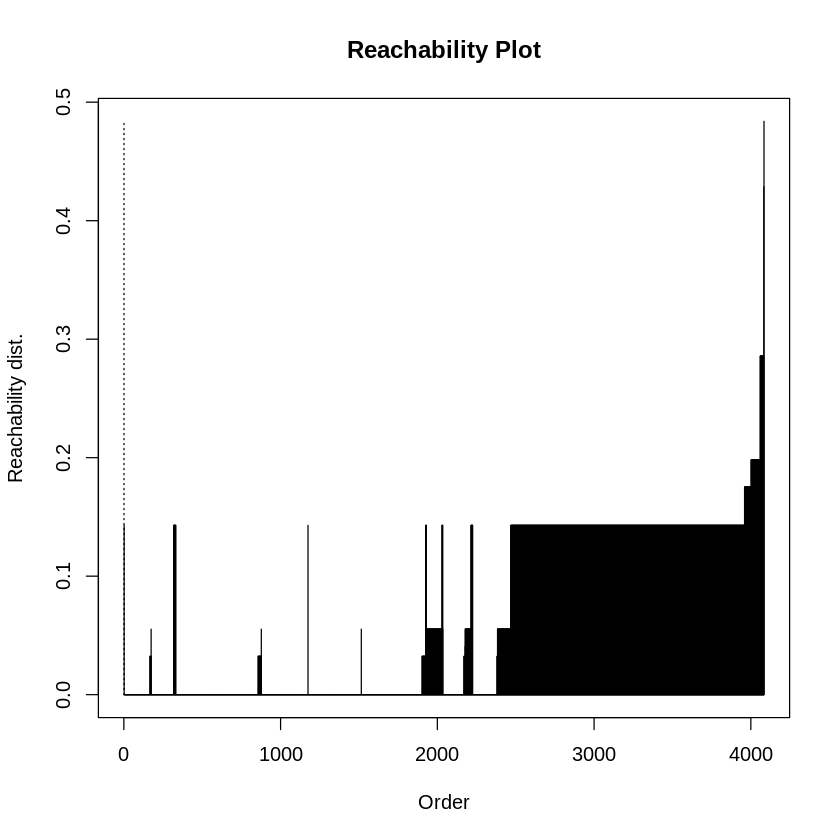

In [49]:
########################
# Density-base methods # 
########################

library("dbscan")
(res_col <- optics(gower_dist, eps=50, minPts = 100))
plot(res_col)


In [50]:
(res_col_d <- extractDBSCAN(res_col, eps_cl=0.1)) #6 Cluster, 961 noise points
(res_col_h <- extractXi(res_col, xi=0.1)) #14 Cluster, 0 noise points
res_col_h$clusters_xi

OPTICS ordering/clustering for 4084 objects.
Parameters: minPts = 100, eps = 50, eps_cl = 0.1, xi = NA
The clustering contains 6 cluster(s) and 1648 noise points.

   0    1    2    3    4    5    6 
1648  316  844  751  100  181  244 

Available fields: order, reachdist, coredist, predecessor, minPts, eps,
                  eps_cl, xi, cluster

OPTICS ordering/clustering for 4084 objects.
Parameters: minPts = 100, eps = 50, eps_cl = NA, xi = 0.1
The clustering contains 9 cluster(s) and 1 noise points.

Available fields: order, reachdist, coredist, predecessor, minPts, eps,
                  eps_cl, xi, clusters_xi, cluster

start,end,cluster_id
1,4083,1
2,173,2
174,317,3
331,876,4
877,1174,5
1175,1514,6
1515,1926,7
2034,2214,8
2225,2468,9


In [51]:
# examine results in each class
db_1 <-  which(res_col_d$cluster %in% c(0))
db_2 <-  which(res_col_d$cluster %in% c(1))
db_3 <-  which(res_col_d$cluster %in% c(2))
db_4 <-  which(res_col_d$cluster %in% c(3))
db_5 <-  which(res_col_d$cluster %in% c(4))
db_6 <-  which(res_col_d$cluster %in% c(5))
b[db_1,]
b[db_2,]
b[db_3,]
b[db_4,]
b[db_5,]
b[db_6,]

,Date,Day_of_Week,Light_Conditions,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Time,Weather_Conditions
1,Winter,Weekend,Darkness - lights lit,2,Dry,Single carriageway,Evening,Fine
2,Winter,Weekend,Darkness - lights lit,2,Dry,Single carriageway,Evening,Fine
3,Winter,Weekend,Daylight,3,Dry,Single carriageway,Morning,Fine
4,Winter,Weekend,Darkness - lights lit,2,Wet or damp,One way street,Night,Bad
6,Winter,Weekday,Darkness - lights lit,2,Dry,Roundabout,Evening,Fine
8,Winter,Weekday,Daylight,2,Wet or damp,One way street,Afternoon,Bad
9,Winter,Weekday,Daylight,1,Wet or damp,Single carriageway,Morning,Bad
10,Winter,Weekday,Darkness - lights lit,3,Wet or damp,Single carriageway,Night,Bad
12,Winter,Weekend,Daylight,1,Dry,Single carriageway,Afternoon,Fine
14,Winter,Weekend,Darkness - lights lit,2,Dry,Dual carriageway,Night,Fine


,Date,Day_of_Week,Light_Conditions,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Time,Weather_Conditions
25,Winter,Weekday,Darkness - lights lit,1,Dry,Single carriageway,Evening,Fine
41,Spring,Weekday,Darkness - lights lit,2,Dry,Single carriageway,Evening,Fine
115,Spring,Weekday,Darkness - lights lit,2,Dry,Single carriageway,Evening,Fine
173,Summer,Weekday,Darkness - lights lit,1,Dry,Single carriageway,Evening,Fine
181,Summer,Weekday,Darkness - lights lit,1,Dry,Single carriageway,Evening,Fine
182,Summer,Weekday,Darkness - lights lit,1,Dry,Single carriageway,Evening,Fine
190,Autumn,Weekday,Darkness - lights lit,1,Dry,Single carriageway,Evening,Fine
207,Autumn,Weekday,Darkness - lights lit,2,Dry,Single carriageway,Evening,Fine
217,Autumn,Weekday,Darkness - lights lit,1,Dry,Single carriageway,Evening,Fine
220,Autumn,Weekday,Darkness - lights lit,2,Dry,Single carriageway,Evening,Fine


,Date,Day_of_Week,Light_Conditions,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Time,Weather_Conditions
7,Winter,Weekday,Daylight,2,Dry,Single carriageway,Morning,Fine
13,Winter,Weekday,Daylight,2,Dry,Single carriageway,Morning,Fine
23,Winter,Weekday,Daylight,1,Dry,Single carriageway,Morning,Fine
29,Winter,Weekday,Daylight,2,Dry,Single carriageway,Morning,Fine
33,Winter,Weekday,Daylight,2,Dry,Single carriageway,Morning,Fine
45,Spring,Weekday,Daylight,1,Dry,Single carriageway,Morning,Fine
48,Spring,Weekday,Daylight,1,Dry,Single carriageway,Morning,Fine
52,Spring,Weekday,Daylight,2,Dry,Single carriageway,Morning,Fine
67,Spring,Weekday,Daylight,2,Dry,Single carriageway,Morning,Fine
68,Spring,Weekday,Daylight,2,Dry,Single carriageway,Morning,Fine


,Date,Day_of_Week,Light_Conditions,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Time,Weather_Conditions
11,Winter,Weekday,Daylight,1,Dry,Single carriageway,Afternoon,Fine
26,Winter,Weekday,Daylight,2,Dry,Single carriageway,Afternoon,Fine
28,Winter,Weekday,Daylight,1,Dry,Single carriageway,Afternoon,Fine
40,Spring,Weekday,Daylight,2,Dry,Single carriageway,Afternoon,Fine
44,Spring,Weekday,Daylight,1,Dry,Single carriageway,Afternoon,Fine
66,Spring,Weekday,Daylight,1,Dry,Single carriageway,Afternoon,Fine
71,Spring,Weekday,Daylight,1,Dry,Single carriageway,Afternoon,Fine
72,Spring,Weekday,Daylight,2,Dry,Single carriageway,Afternoon,Fine
78,Spring,Weekday,Daylight,2,Dry,Single carriageway,Afternoon,Fine
85,Spring,Weekday,Daylight,1,Dry,Single carriageway,Afternoon,Fine


,Date,Day_of_Week,Light_Conditions,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Time,Weather_Conditions
5,Winter,Weekday,Daylight,1,Dry,Dual carriageway,Afternoon,Fine
53,Spring,Weekday,Daylight,1,Dry,Dual carriageway,Afternoon,Fine
57,Spring,Weekday,Daylight,2,Dry,Dual carriageway,Afternoon,Fine
64,Spring,Weekday,Daylight,2,Dry,Dual carriageway,Afternoon,Fine
92,Spring,Weekday,Daylight,2,Dry,Dual carriageway,Afternoon,Fine
110,Summer,Weekday,Daylight,2,Dry,Dual carriageway,Afternoon,Fine
111,Summer,Weekday,Daylight,2,Dry,Dual carriageway,Afternoon,Fine
193,Autumn,Weekday,Daylight,2,Dry,Dual carriageway,Afternoon,Fine
209,Autumn,Weekday,Daylight,2,Dry,Dual carriageway,Afternoon,Fine
211,Autumn,Weekday,Daylight,2,Dry,Dual carriageway,Afternoon,Fine


,Date,Day_of_Week,Light_Conditions,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Time,Weather_Conditions
27,Winter,Weekday,Daylight,1,Dry,Dual carriageway,Morning,Fine
46,Spring,Weekday,Daylight,1,Dry,Dual carriageway,Morning,Fine
47,Spring,Weekday,Daylight,1,Dry,Dual carriageway,Morning,Fine
60,Spring,Weekday,Daylight,2,Dry,Dual carriageway,Morning,Fine
136,Summer,Weekday,Daylight,2,Dry,Dual carriageway,Morning,Fine
138,Summer,Weekday,Daylight,2,Dry,Dual carriageway,Morning,Fine
158,Summer,Weekday,Daylight,1,Dry,Dual carriageway,Morning,Fine
160,Summer,Weekday,Daylight,1,Dry,Dual carriageway,Morning,Fine
165,Summer,Weekday,Daylight,2,Dry,Dual carriageway,Morning,Fine
167,Summer,Weekday,Daylight,2,Dry,Dual carriageway,Morning,Fine
